# Logistic regression - scratch paper (notebook)
<b> 5/30/2024 </b>

In [36]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
from sklearn.preprocessing import OneHotEncoder


import warnings
warnings.simplefilter(action='ignore')
from utils import *

In [26]:
train_data = pd.read_csv('/Users/annikaseo-yeonkim/Desktop/MongooseAI/1주차/titanic/datasets/train (1).csv')
test_data = pd.read_csv('/Users/annikaseo-yeonkim/Desktop/MongooseAI/1주차/titanic/datasets/test.csv')
# train_data = pd.concat([train_data,test_data],axis = 0).reset_index(drop = False)
# print(train_data['PassengerId'].count())
train_data.info()
# print(train_data['Survived'].isnull().sum())
# plot_entropy(train_data['Age'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [32]:
median_age_by_pclass = train_data.groupby('Pclass')['Age'].median()
# print(median_age_by_pclass)

def fill_age(row):
    if pd.isnull(row['Age']):
        return median_age_by_pclass[row['Pclass']]
    else:
        return row['Age']
    
train_data['Age'] = train_data.apply(fill_age, axis=1)



In [60]:
train_data['Deck'] = train_data['Cabin'].str.slice(0,1)
deck_distribution = train_data['Deck'].value_counts(dropna = False)
clean_distribution = train_data['Deck'].value_counts(dropna = True)

print(train_data.groupby('Deck')['Fare'].median())
# correlation_coefficient3 = train_data['Deck'].corr(train_data['Pclass'])
# print(train_data.groupby('Survived')['Age'].median())

print(train_data.groupby('Deck')['Pclass'].value_counts()) #Cabin C had the most 1st class passengers 

train_data['title'] = train_data.Name.str.extract('\, ([A-Z][^ ]*\.)',expand=False) #title deck

#print(train_data['Fare'].min()) # there are zero values in the dataset
#print((train_data.Fare == 0).sum()) # 17 zero values 
train_data.Fare = train_data.Fare.replace(0,np.NaN) # replace 0 with NaN
# print((train_data.Fare == 0).sum())

#now fill in the Fare column
train_data['Fare_clean'] = train_data.Fare.dropna()
#print(train_data['Fare_clean'])
correlation_coefficient3 = train_data['Fare_clean'].corr(train_data['Pclass']) #correlation_coefficient3 = -0.5694
median_fare_by_pclass = train_data.groupby('Pclass')['Fare'].median()
print(median_fare_by_pclass)



Deck
A    35.50000
B    80.00000
C    83.47500
D    53.10000
E    45.18125
F    13.00000
G    13.58125
T    35.50000
Name: Fare, dtype: float64
Deck  Pclass
A     1         15
B     1         47
C     1         59
D     1         29
      2          4
E     1         25
      2          4
      3          3
F     2          8
      3          5
G     3          4
T     1          1
Name: count, dtype: int64
Pclass
1    61.9792
2    15.0229
3     8.0500
Name: Fare, dtype: float64


In [62]:
def fill_fare(row):
    if pd.isnull(row['Fare']):
        return median_fare_by_pclass[row['Pclass']]
    else:
        return row['Fare']
    
train_data['Fare'] = train_data.apply(fill_fare, axis=1)
# fare_distribution = train_data['Fare'].value_counts(dropna = False)

train_data['Deck'] = train_data.groupby('Pclass')['Deck'].transform(lambda x: x.fillna(x.mode().loc[0])) # used chatgpt
# print(sum(train_data['Deck'].isnull())) --> validated the results (the 'Deck' column is now filled)

In [69]:
train_data.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
Deck            0
title           1
Fare_clean     15
dtype: int64

In [72]:
train_data = train_data.copy()
train_data["Age"].fillna(train_data["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(train_data['Embarked'].value_counts().idxmax(), inplace=True)

# one-hot encoding
<b> the 'pclass' variable has 3 possible values - 1,2,3 </b>


In [73]:
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace= True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_train = training
final_train.head()

,Survived,Age,SibSp,Parch,Fare,Deck,title,Fare_clean,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,1,0,7.2500,F,Mr.,7.2500,False,False,True,False,False,True,True
1,1,38.0,1,0,71.2833,C,Mrs.,71.2833,True,False,False,True,False,False,False
2,1,26.0,0,0,7.9250,F,Miss.,7.9250,False,False,True,False,False,True,False
3,1,35.0,1,0,53.1000,C,Mrs.,53.1000,True,False,False,False,False,True,False
4,0,35.0,0,0,8.0500,F,Mr.,8.0500,False,False,True,False,False,True,True


In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ["Age","Fare","Pclass_1","Pclass_2","Pclass_3","Embarked_C","Embarked_S","Sex_male"] 
X = final_train[cols]
y = final_train['Survived']
# Build a logreg and compute the feature importances
model = LogisticRegression()
# # create the RFE model and select 8 attributes
# rfe = RFE.fit(X, y)
# # summarize the selection of the attributes
# print('Selected features: %s' % list(X.columns[rfe.support_]))
# print(X)

In [90]:
# train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
# train_data.drop('SibSp', axis=1, inplace=True)
# print(training.columns)
# training.drop('Parch', axis=1, inplace=True)
# training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])
# training.drop('Sex_male', axis=1, inplace=True)
# training.drop('PassengerId', axis=1, inplace=True)
# training.drop('Name', axis=1, inplace=True)
# training.drop('Ticket', axis=1, inplace=True)

final_train = training
final_train.head()
final_train.isnull().sum()

Survived        0
Age             0
Fare            0
Deck            0
title           1
Fare_clean     15
TravelAlone     0
Pclass_1        0
Pclass_2        0
Pclass_3        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Sex_male        0
dtype: int64

# Graphs and distributions

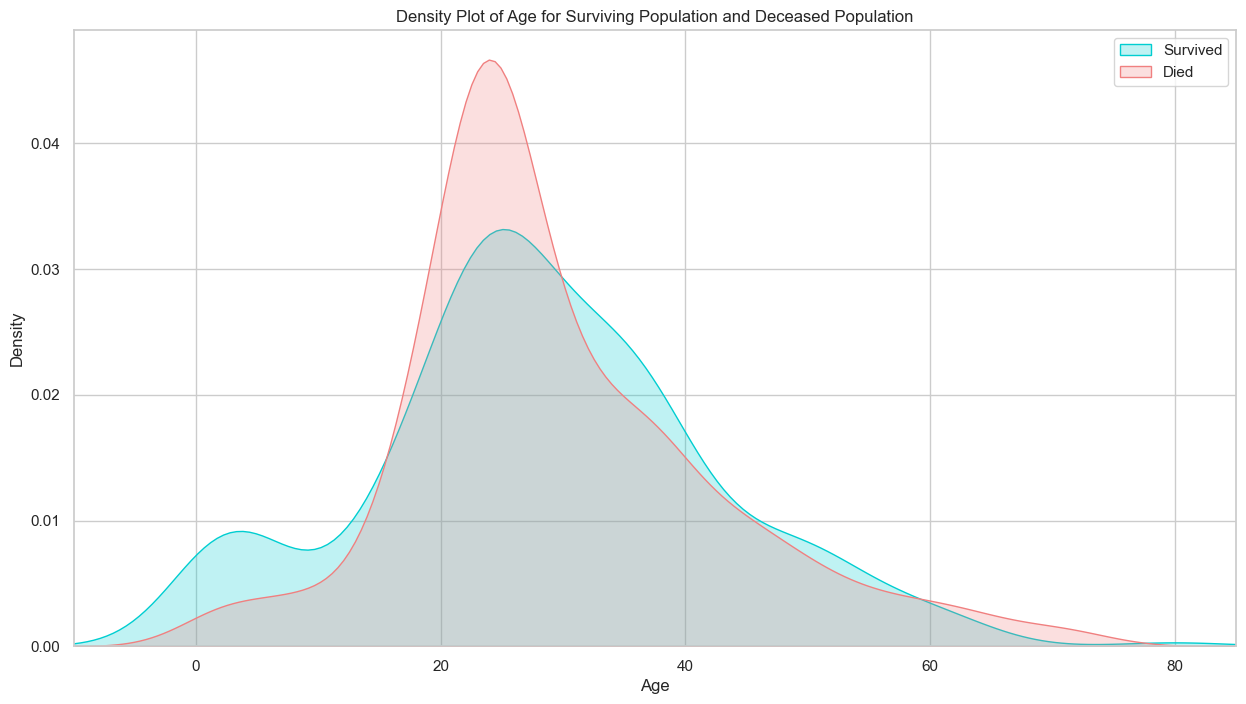

In [92]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Age"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Age"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()
final_train['IsMinor']=np.where(final_train['Age']<=16, 1, 0)

final_train['IsMinor']=np.where(final_train['Age']<=16, 1, 0)

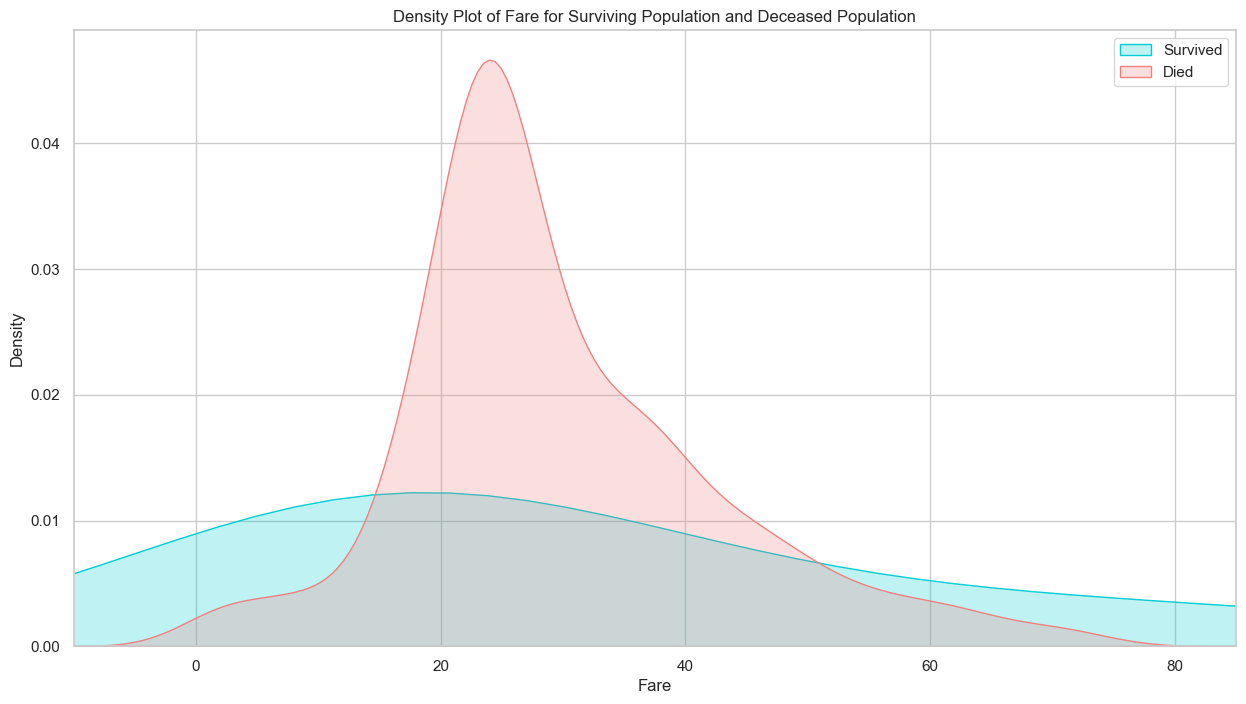

In [93]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Fare"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Age"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-10,85)
plt.show()


Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


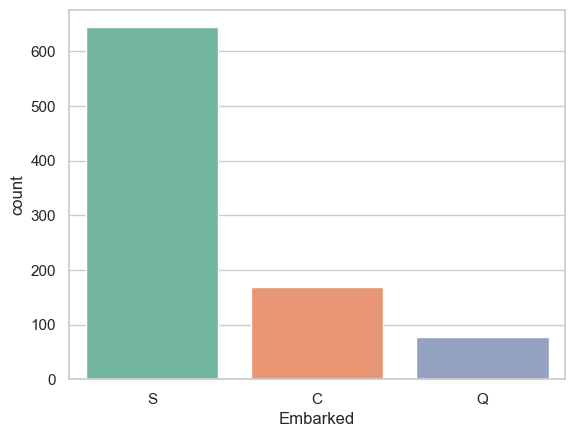

In [6]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(train_data['Embarked'].value_counts())
sns.countplot(x='Embarked', data=train_data, palette='Set2')
plt.show()

In [49]:
class Logisticregression():
    def __init__(self, learning_rate=0.001, n_iters=1000):
            self.lr = learning_rate
            self.n_iters = n_iters
            self.weights = None
            self.bias = None
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))

    def compute_loss(self, y_true, y_pred):
        epsilon = 1e-9
        y1 = y_true * np.log(y_pred + epsilon)
        y2 = (1-y_true) * np.log(1 - y_pred + epsilon)
        return -np.mean(y1 + y2)
    
    def feed_forward(self,x): 
         z= np.dot(x,self.weights) + self.bias
         A = self.sigmoid(z)
         return A

    def fit(self,x,y):
         n,m= x.shape
         self.weights = np.zeros(m)
         self.bias = 0

         for i in range(self.n_iters):
            A = self.feed_forward(x)
            self.losses.append(self.compute_loss(y,A))
            dz = A - y # derivative of sigmoid and bce X.T*(A-y)
            # compute gradients
            dw = (1 / n) * np.dot(X.T, dz)
            db = (1 / n) * np.sum(dz)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    
    def predict(self,x):
        threshold = 0.5
        y_hat = np.dot(x,self.weights) + self.bias
        y_pred = self.sigmoid(y_hat)
        y_pred_cls = []
        if y_pred >=0.5:
            y_pred_cls.append(1)
        else:
             y_pred_cls.append(0)


In [94]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

x = training['Age']
y = train_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234
)

print(y_train)

regressor = Logisticregression(learning_rate=0.0001, n_iters=1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
# cm ,accuracy,sens,precision,f_score  = confusion_matrix(np.asarray(y_test), np.asarray(predictions))
# print("Test accuracy: {0:.3f}".format(accuracy))
# print("Confusion Matrix:",np.array(cm))

125    1
305    1
631    0
643    1
808    0
      ..
204    1
53     1
294    0
723    0
815    0
Name: Survived, Length: 712, dtype: int64


TypeError: loop of ufunc does not support argument 0 of type float which has no callable exp method